# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
print(brain_name)
print(brain)

ReacherBrain
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]
print(env_info.agents)

[932, 944, 946, 962, 980, 990, 1018, 1032, 1044, 1054, 1086, 1090, 1094, 1106, 1128, 1138, 1170, 1188, 1194, 1208]


In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.90150833e+00  -1.00000000e+00
   1.25147629e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -5.22214413e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [7]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1 
     
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.06299999859184027


When finished, you can close the environment.

In [8]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [9]:
import time

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from ddpg_agent import Agent

import workspace_utils
from workspace_utils import active_session

In [11]:
from ddpg_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)


Episode 10	Average Score: 0.90	Score: 1.82
Episode 20	Average Score: 1.73	Score: 4.30
Episode 30	Average Score: 3.89	Score: 9.790
Episode 40	Average Score: 5.49	Score: 9.781
Episode 50	Average Score: 7.34	Score: 19.27
Episode 60	Average Score: 9.14	Score: 19.41
Episode 70	Average Score: 11.05	Score: 26.14
Episode 80	Average Score: 12.98	Score: 29.34
Episode 90	Average Score: 15.10	Score: 35.67
Episode 100	Average Score: 17.16	Score: 35.57
Episode 110	Average Score: 20.55	Score: 35.39
Episode 120	Average Score: 23.74	Score: 33.00
Episode 130	Average Score: 26.41	Score: 35.48
Episode 140	Average Score: 28.95	Score: 36.21
Episode 145	Average Score: 30.09	Score: 34.53solved!
2713.0511631965637


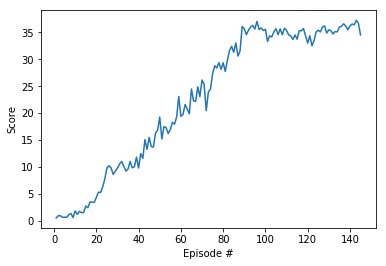

In [12]:
def ddpg_multi_agent(n_episodes=1000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    start_time = time.time()
    for i_episode in range(1, n_episodes+1):
        ##state = env.reset()
        ##agent.reset()
        average_score = 0
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        score = 0
        scores_agents = np.zeros(num_agents)
        agent.reset()############### was this the key
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores_agents += rewards
            if any(dones):
                break 
        score = np.mean(scores_agents)
        scores_deque.append(score)
        average_score = np.mean(scores_deque)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 10 == 0: 
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        
        if average_score >= 30:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print("solved!")
            print(time.time() - start_time)
            break
 
    return scores


with active_session():
    scores = ddpg_multi_agent()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show() 
    
    np.savetxt("foo_3.csv", scores, delimiter=",")

In [ ]:
1+

Episode:1, Low Score:27.49, High Score:38.41, Score:34.17, Best Score:34.17, Average Score:34.17, Best Avg Score:34.17
Average score of 30 achieved


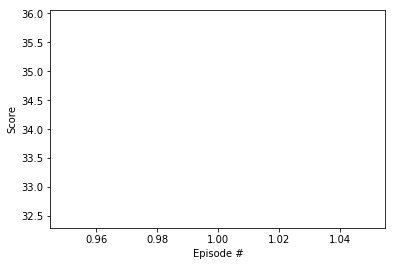

Episode:1, Low Score:27.60, High Score:36.32, Score:33.72, Best Score:33.72, Average Score:33.72, Best Avg Score:33.72
Average score of 30 achieved


In [12]:
def ddpg(n_episodes=2000, max_steps=1000):
    scores_mean = deque(maxlen=100)
    scores = []
    best_score = 0
    best_average_score = 0
    for i_episode in range(1, n_episodes+1):
        average_score = 0
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations            
        scores_agents = np.zeros(num_agents)             
        score = 0
        agent.reset()
        for step in range(max_steps):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]     
            next_states = env_info.vector_observations   
            rewards = env_info.rewards                   
            dones = env_info.local_done                  
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores_agents += rewards
            if np.any(dones):
                break
        score = np.mean(scores_agents)
        scores_mean.append(score)
        average_score = np.mean(scores_mean)
        scores.append(score)
        if score > best_score:
            best_score = score
        if average_score > best_average_score:
            best_average_score = average_score
        print("Episode:{}, Low Score:{:.2f}, High Score:{:.2f}, Score:{:.2f}, Best Score:{:.2f}, Average Score:{:.2f}, Best Avg Score:{:.2f}".format(i_episode, scores_agents.min(), scores_agents.max(), score, best_score, average_score, best_average_score))
        if average_score > 30:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print("Average score of 30 achieved")            
            break
    return scores



with active_session():
    scores = ddpg()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show() 
    
    np.savetxt("foo.csv", scores, delimiter=",")
scores = ddpg()

1) define DDPG agent class

2) define agent learning function

    (a) run learning function
         1. initialize critic network, and actor
         2. initialize critic target network, and target actor with same weights
         3. Initialize Buffer
         4. FOR episodes = 1:M
              initialize random process (...)
              reset environment (receive initial observation state s_1)
             4.1. FOR t = 1:T
                     select action a_t = mu(s_t | theta_mu) + N_t   w/ current policy & exploration noise
                     execute action a_t, observe reward r_t and new state s_t+1
                     store (s,a,r,s') in buffer
                     sample random minibatch of N transitions from buffer
                     set y_i = r_i + gamma * Q'(s_i+1, mu'(s_i+1|theta_mu')|theta_Q')
                     update critic by minimizing the loss L = 1/N (sum (y_i - Q(s_i, a_i | theta_Q))^2
                     update the actor policy using the sampled policy gradient:
                     update the target networks (slow update)
             end
          end
 
    (b) stop when solved or max_episodes
3) plot results

In [13]:
import time

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from ddpg_agent import Agent

import workspace_utils
from workspace_utils import active_session

seed = random.randint(0,1000)  
agent = Agent(state_size=state_size, action_size=action_size, random_seed=seed)
print(seed)

472


In [14]:
def ddpg(n_episodes=1000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    cur_time = time.time()
    for i_episode in range(1, n_episodes+1):
        ##state = env.reset()
        ##agent.reset()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            
            
            ##next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score), end="")
        if i_episode % 10 == 0:
                        
            elapsed = time.time() - cur_time 
            print("")
            print(elapsed)
            cur_time = time.time() 
            
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        
        if np.mean(scores_deque) >= 30:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print("solved!")
            break
 
    return scores


with active_session():
    scores = ddpg()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show() 
    
    np.savetxt("foo2.csv", scores, delimiter=",")

ValueError: non-broadcastable output operand with shape (4,) doesn't match the broadcast shape (20,4)

In [ ]:
from actor_critic_model import QNetwork, Deterministic_Actor 
import time

import torch
import torch.nn.functional as F
import torch.optim as optim
import random
from collections import namedtuple, deque
import numpy as np


import copy


BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 1024         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_critic = 1e-3               # learning rate for critic Q network
LR_actor  = 1e-4               # learning rate for actor 
WEIGHT_DECAY = 0               # L2 weight decay
UPDATE_EVERY = 1
 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cuda_available = torch.cuda.is_available()

class Agent():
    def __init__(self, state_size, action_size, seed):

        self.time_step = 0
        
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        
        # critic network and actor (normal and target)
        self.critic_qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
        self.critic_qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_qnetwork_local.parameters(),lr=LR_critic, weight_decay=WEIGHT_DECAY)
        
        self.actor_local = Deterministic_Actor(state_size, action_size, seed).to(device)
        self.actor_target = Deterministic_Actor(state_size, action_size, seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(),lr=LR_actor)
        
        # noise process
        self.noise = OUNoise(action_size, seed, mu=0.0, theta = 0.15, sigma=0.2)
         
        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.time_step += 1
        self.memory.add(state, action, reward, next_state, done)
 
        # If enough samples are available in memory, get random subset and learn
        if len(self.memory) > BATCH_SIZE:
            if self.time_step % UPDATE_EVERY == 0:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().to(device) #unsqueeze(0) 필요함?
        self.actor_local.eval()
        with torch.no_grad():
            ##action_values = self.actor_local(state)
            action_values = self.actor_local(state).cpu().data.numpy()
        self.critic_qnetwork_local.train()
         
        if add_noise:
            action_values += self.noise.sample()
        
        return np.clip(action_values,-1,1)
    
    def reset(self):
        self.noise.reset()
    

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """ 
        states, actions, rewards, next_states, dones = experiences
 
        ### Get argmax Q(S_t+1, a) actions from local_model
        ##local_actions = self.qnetwork_local(next_states).detach().max(1)[1].unsqueeze(1)
        ### Get expected Q values from target model
        ##Q_targets_next = self.qnetwork_target(next_states).gather(1,local_actions)
        ##Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_qnetwork_target(next_states, actions_next)
        Q_targets = rewards + (gamma * Q_targets_next * (1-dones))
        
        
        # Get expected Q values from local model
        ### Q_expected = self.qnetwork_local(states).gather(1, actions) 
        Q_expected = self.critic_qnetwork_local(states, actions)


        # Compute loss
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        #torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()
        
        # Compute actor loss        
        actions_pred = self.actor_local(states)        
        actor_loss = -self.critic_qnetwork_local(states, actions_pred).mean()        
        # Minimize the loss        
        self.actor_optimizer.zero_grad()       
        actor_loss.backward()        
        self.actor_optimizer.step()
        
        
        # ------------------- update target network ------------------- #
        self.soft_update(self.critic_qnetwork_local, self.critic_qnetwork_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)          

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

       
    
    
class OUNoise:
    """Ornstein-Uhlenbeck process."""
    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.size = size
        self.reset()
    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)
    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        ##dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        dx = self.theta * (self.mu - x) + self.sigma * np.random.normal(loc=0.0,scale=1.0,size=self.size)
        self.state = x + dx
        return self.state
        
    
            
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)            

agent = Agent(state_size,action_size,2)     

In [ ]:
import torch
from collections import deque
import workspace_utils
from workspace_utils import active_session

def ddpg(n_episodes=2000, max_t=1000): 
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    #eps = eps_start                    # initialize epsilon
    cur_time = time.time()
    for i_episode in range(1, n_episodes+1):
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):

            action = agent.act(state)
            ####if cuda_available:
            ####    action = agent.act(state).cpu().numpy() + np.random.randn(1,4)*0.2
            ####else:
            ####    action = agent.act(state).numpy() + np.random.randn(1,4)*0.2
            ####np.clip(action, -1, 1, out=action)
            
            #next_state, reward, done, _ = env.step(action) 
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        ###eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window))) 
            
            elapsed = time.time() - cur_time 
            print(elapsed)
            cur_time = time.time() 
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'ddpg_checkpoint.pth')
            
    return scores

with active_session():
    scores = ddpg(1000,1000)
    np.savetxt("foo.csv", scores, delimiter=",")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(scores)

In [ ]:
brain_name